In [1]:
install.packages('forecast')
install.packages('TSA')
library(forecast)
library(TSA)

'quadprog', 'fracdiff', 'lmtest', 'tseries', 'urca', 'RcppArmadillo'(들)을 또한 설치합니다.





  There are binary versions available but the source versions are later:
                  binary   source needs_compilation
fracdiff           1.5-2    1.5-3              TRUE
tseries          0.10-53  0.10-58              TRUE
urca               1.3-3    1.3-4              TRUE
RcppArmadillo 0.12.2.0.0 14.0.2-1              TRUE
forecast            8.21   8.23.0              TRUE

  Binaries will be installed
package 'quadprog' successfully unpacked and MD5 sums checked
package 'fracdiff' successfully unpacked and MD5 sums checked
package 'lmtest' successfully unpacked and MD5 sums checked
package 'tseries' successfully unpacked and MD5 sums checked
package 'urca' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\5-06\AppData\Local\Temp\RtmpugRdAs\downloaded_packages


'leaps', 'locfit'(들)을 또한 설치합니다.





  There are binary versions available but the source versions are later:
        binary   source needs_compilation
leaps      3.1      3.2              TRUE
locfit 1.5-9.7 1.5-9.10              TRUE

  Binaries will be installed
package 'leaps' successfully unpacked and MD5 sums checked
package 'locfit' successfully unpacked and MD5 sums checked
package 'TSA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\5-06\AppData\Local\Temp\RtmpugRdAs\downloaded_packages


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'TSA':
  method       from    
  fitted.Arima forecast
  plot.Arima   forecast


다음의 패키지를 부착합니다: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar




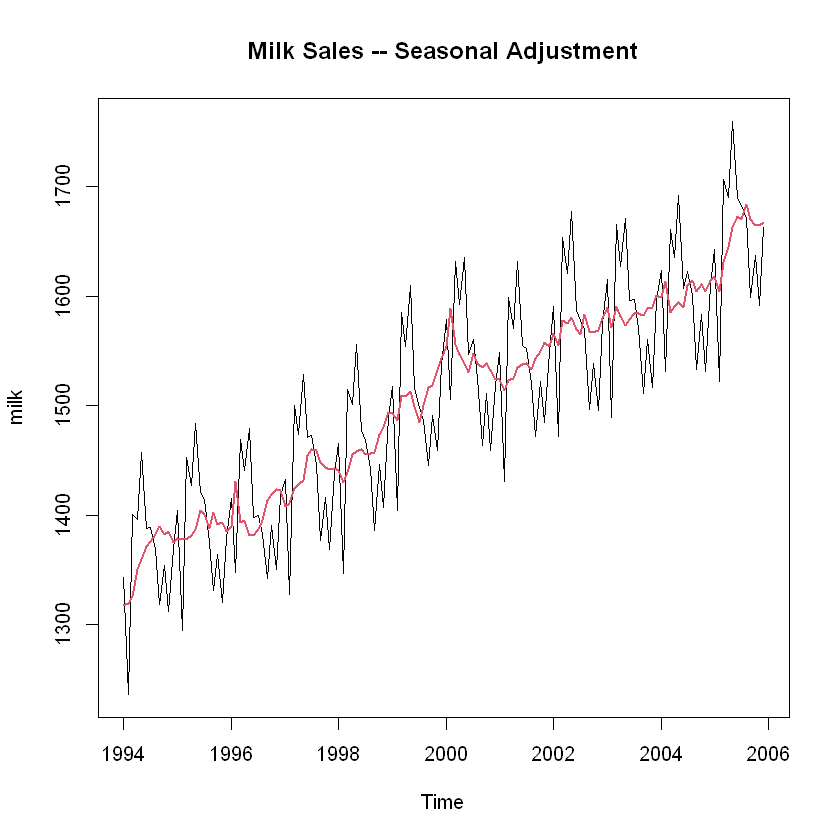

In [2]:
data(milk)
plot(milk, main='Milk Sales -- Seasonal Adjustment')
lines (seasadj(decompose(milk)),col=2, lwd=2)

In [3]:
mm3 <- filter(milk, f=rep(1/3,3))
mm6 <- filter(milk, f=rep(1/6,6))
mm12 <- filter(milk, f=rep(1/12,12))

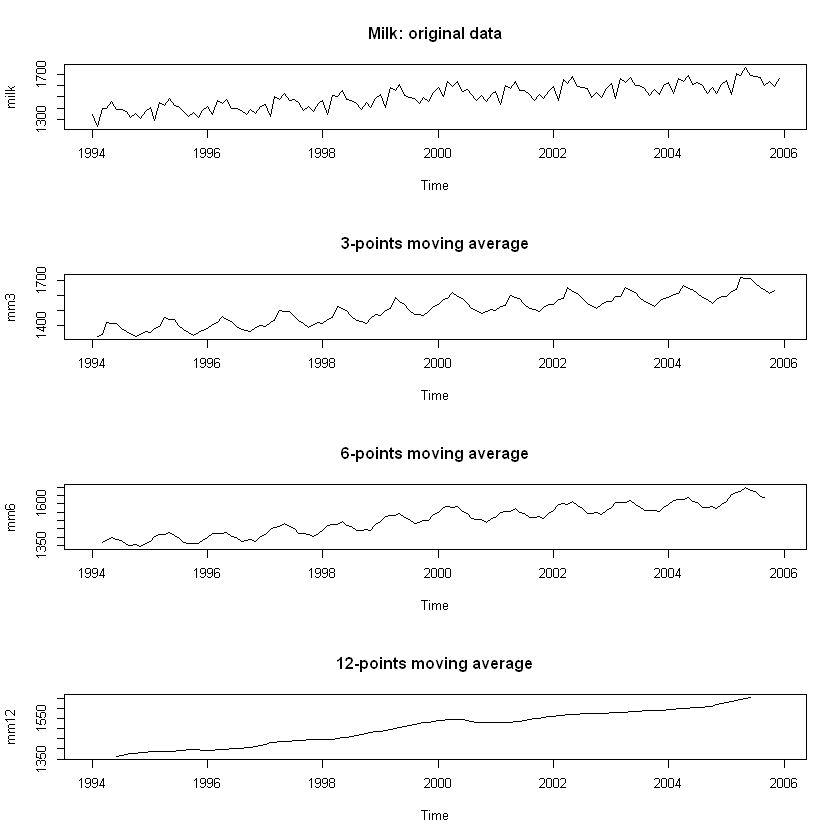

In [4]:
par(mfcol=c(4,1))
plot(milk, main='Milk: original data')
plot(mm3, main='3-points moving average')
plot(mm6, main='6-points moving average')
plot(mm12, main='12-points moving average')

In [5]:
# install.packages('forecast')
library(forecast)


In [6]:
dd1 <- matrix(c(1342, 1442, 1252, 1343,
                1425, 1362, 1256, 1272,
                  1243, 1359, 1412, 1253,
                1201, 1478, 1322, 1406,
                1254, 1289, 1497, 1208))

In [7]:
dd1.ts <- ts(data=dd1, start=c(2016,1), frequency=4)
dd1.ts


,Qtr1,Qtr2,Qtr3,Qtr4
2016,1342,1442,1252,1343
2017,1425,1362,1256,1272
2018,1243,1359,1412,1253
2019,1201,1478,1322,1406
2020,1254,1289,1497,1208


In [8]:
ff <- filter(dd1.ts, filter=rep(1, 4)/4, method="convolution", sides=1)
#합성곱 필터링 신경망과 같은것

In [9]:
ff

,Qtr1,Qtr2,Qtr3,Qtr4
2016,NA,NA,NA,1344.75
2017,1365.50,1345.50,1346.50,1328.75
2018,1283.25,1282.50,1321.50,1316.75
2019,1306.25,1336.00,1313.50,1351.75
2020,1365.00,1317.75,1361.50,1312.00


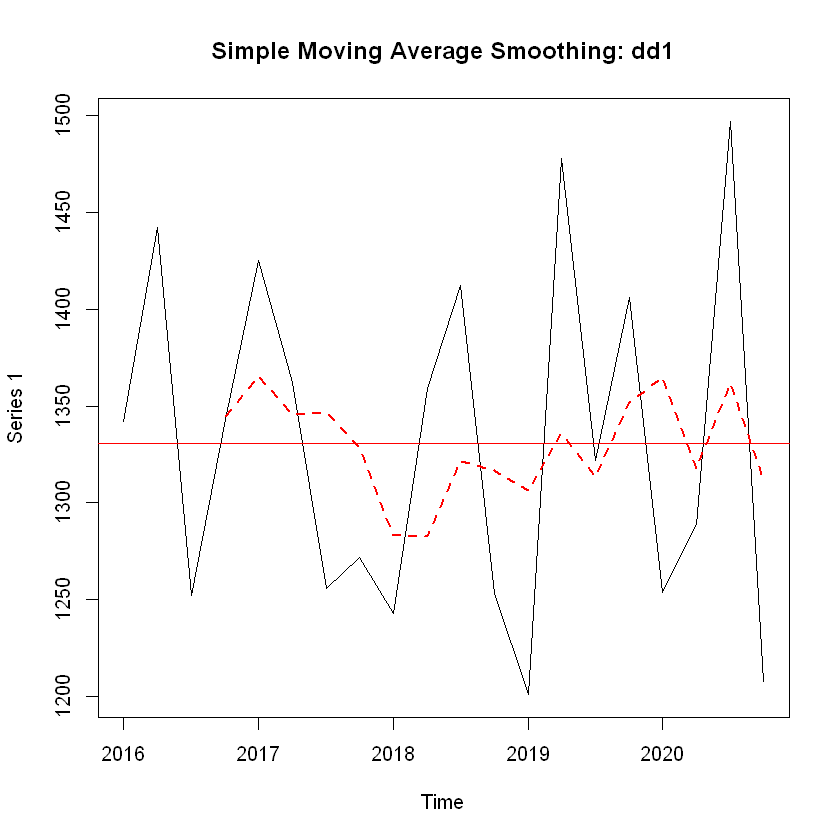

In [10]:
plot(dd1.ts, main="Simple Moving Average Smoothing: dd1")
lines(ff, col="red", lty=2, lwd=2)
abline(h=mean(dd1.ts), col='red')


In [ ]:
#진행위치, 시작위치가 조금 밀리게 된다.(이동평활을 하게되면)
#원본 데이터의 특징, 변동특징은 어느정도 유지하면서 줄어드는 것을 알 수 있다

### Box-Pierce test
* 귀무가설은 독립적이다.
* 대립가설은 자기상관이 있다
* p-value가 0.05보다 크면 독립성 획득, 0.05보다 작으면 자기 상관성 유지

In [11]:
res <- ff[-1:-3, ] - dd1.ts[-1:-3, ]
Box.test(res)



	Box-Pierce test

data:  res
X-squared = 0.68668, df = 1, p-value = 0.4073


## 2. 이중 이동평균 평활법 (Double Moving Average Smoothing)


In [12]:
ff1 <- filter(dd1.ts, filter=rep(1,3)/3, method="convolution", sides=1)
ff2 <- filter(ff1, filter=rep(1,3)/3, method="convolution", sides=1)


In [13]:
ff1

,Qtr1,Qtr2,Qtr3,Qtr4
2016,NA,NA,1345.333,1345.667
2017,1340.000,1376.667,1347.667,1296.667
2018,1257.000,1291.333,1338.000,1341.333
2019,1288.667,1310.667,1333.667,1402.000
2020,1327.333,1316.333,1346.667,1331.333


In [14]:
ff2

,Qtr1,Qtr2,Qtr3,Qtr4
2016,NA,NA,NA,NA
2017,1343.667,1354.111,1354.778,1340.333
2018,1300.444,1281.667,1295.444,1323.556
2019,1322.667,1313.556,1311.000,1348.778
2020,1354.333,1348.556,1330.111,1331.444


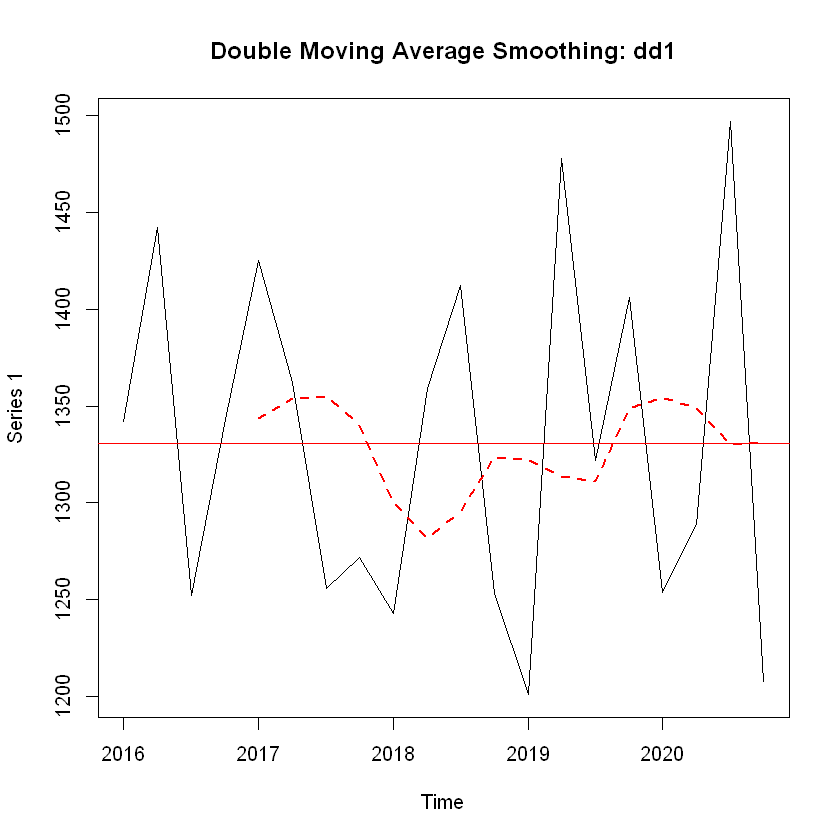

In [15]:
plot(dd1.ts, main="Double Moving Average Smoothing: dd1")
lines(ff2, col="red", lty=2, lwd=2)
abline(h=mean(dd1.ts), col='red')


In [16]:
res <- ff2[-1:-3, ] - dd1.ts[-1:-3, ]
Box.test(res)



	Box-Pierce test

data:  res
X-squared = 0.737, df = 1, p-value = 0.3906


### 3. 가중 이동평균 평활법 (Weighted Moving Average Smoothing)
* 최근 트렌드에 가중치를 두고 평활


In [17]:
w1 <- c(0.4, 0.3, 0.2, 0.1)  # 직전 시간에 40%, 전전시간 30%
ff3 <- filter(dd1.ts, filter=w1, method="convolution", sides=1)


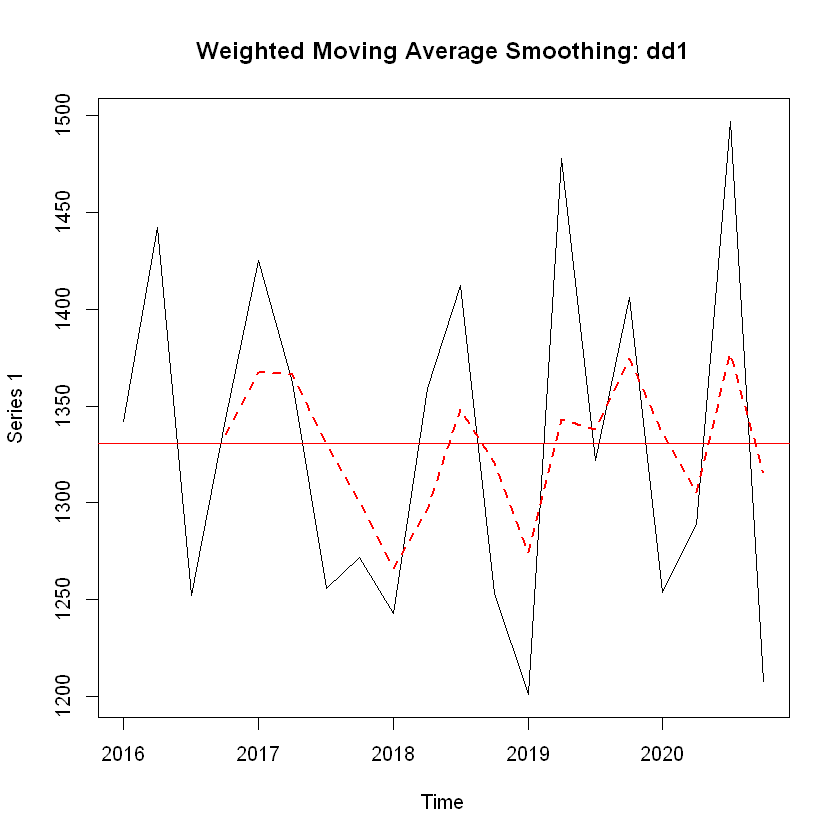

In [18]:
plot(dd1.ts, main="Weighted Moving Average Smoothing: dd1")
lines(ff3, col="red", lty=2, lwd=2)
abline(h=mean(dd1.ts), col='red')


In [19]:
res <- ff3[-1:-3, ] - dd1.ts[-1:-3, ]
Box.test(res)


	Box-Pierce test

data:  res
X-squared = 1.2749, df = 1, p-value = 0.2588


4. 이중 가중 이동평균 평활법 (Double Weight Moving Average Smoothing)


In [20]:
w1 <- c(0.4, 0.3, 0.2, 0.1)  # 직전 시간에 40%, 전전시간 30%
ff3 <- filter(dd1.ts, filter=w1, method="convolution", sides=1)
ff4 <- filter(ff3, filter=w1, method="convolution", sides=1)
ff4

,Qtr1,Qtr2,Qtr3,Qtr4
2016,NA,NA,NA,NA
2017,NA,NA,1348.99,1329.26
2018,1299.30,1291.59,1311.56,1318.77
2019,1305.42,1318.71,1325.08,1347.31
2020,1348.52,1331.47,1346.91,1333.87


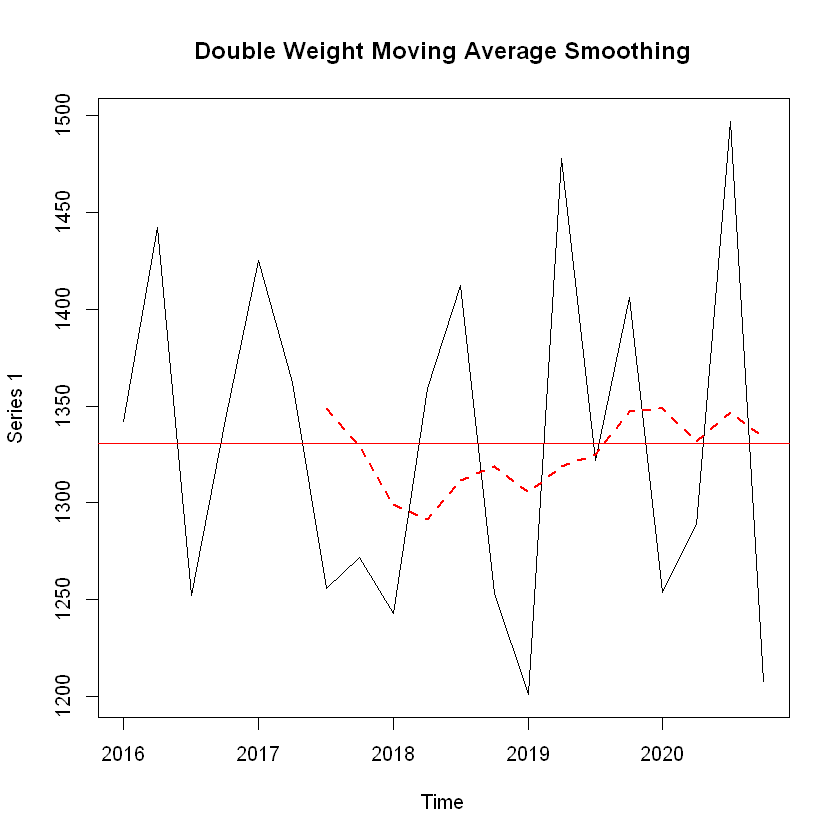

In [21]:
plot(dd1.ts, main="Double Weight Moving Average Smoothing")
lines(ff4, col="red", lty=2, lwd=2)
abline(h=mean(dd1.ts), col='red')


In [ ]:
# 평활작업을했으니 미래값이 어떻게 될지 예측할 수 있다

In [22]:
f1 <- forecast(ff, h=1)  # 1시점 미래 값 예측
f2 <- forecast(ff2, h=1)
f3 <- forecast(ff3, h=1)
f4 <- forecast(ff4, h=1)


Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
"Missing values encountered. Using longest contiguous portion of time series"
Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
"Missing values encountered. Using longest contiguous portion of time series"
Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
"Missing values encountered. Using longest contiguous portion of time series"
Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
"Missing values encountered. Using longest contiguous portion of time series"


In [23]:
f1

        Point Forecast    Lo 80    Hi 80    Lo 95   Hi 95
2021 Q1       1330.823 1295.575 1366.071 1276.916 1384.73

우유값 데이터를 가지고 예측을 한건데 2021년 1분기 예측값은  1330.823이 될것 신뢰구간 80퍼 안에서 가격과, 신뢰구간 95 안에서의 가격은 이렇게 된다라는 의미

In [25]:
f2

        Point Forecast    Lo 80    Hi 80   Lo 95    Hi 95
2021 Q1       1331.444 1306.824 1356.065 1293.79 1369.098

In [26]:
f3

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2021 Q1       1329.126 1285.268 1372.984 1262.051 1396.201

In [27]:
f4

        Point Forecast   Lo 80    Hi 80    Lo 95    Hi 95
2021 Q1       1333.871 1312.34 1355.403 1300.942 1366.801

# 요소분해
* 계절성, 추세성, 주기변동 등 다양한 변동 성분이 있는데 그것을 분해해서 정상 시계열로 만들어주는 것
* 선형적으로 구성되는 가법모형(Additive)
* 비선형적으로 구성되는 승법모형(Multiplicative)


시계열 자료의 분해 decompose (가법모형)


In [28]:
# 기본 시계열 자료
dd <- matrix( c(1342, 1442, 1252, 1343,
                1425, 1362, 1256, 1272,
                  1243, 1359, 1412, 1253,
                1201, 1478, 1322, 1406,
                1254, 1289, 1497, 1208))

dd.ts <- ts(data=dd, start=c(2016, 1), frequency=4)

# 계절변동 자료
dd2 <- matrix( c(1142, 1242, 1452, 1543,
                1125, 1262, 1456, 1572,
                  1143, 1259, 1412, 1553,
                1121, 1258, 1472, 1546,
                1154, 1249, 1477, 1548))

# 계절추세변동 자료
dd4 <- matrix( c(1142, 1242, 1452, 1543,
                1225, 1362, 1556, 1672,
                  1343, 1459, 1662, 1753,
                1421, 1558, 1772, 1846,
                1554, 1649, 1877, 1948))


In [29]:
dd.ts <- ts(data=dd, start=c(2016, 1), frequency=4)
dd2.ts <- ts(data=dd2, start=c(2016, 1), frequency=4)
dd4.ts <- ts(data=dd4, start=c(2016, 1), frequency=4)


In [30]:
dd.ts 

,Qtr1,Qtr2,Qtr3,Qtr4
2016,1342,1442,1252,1343
2017,1425,1362,1256,1272
2018,1243,1359,1412,1253
2019,1201,1478,1322,1406
2020,1254,1289,1497,1208


In [31]:
dd2.ts 

,Qtr1,Qtr2,Qtr3,Qtr4
2016,1142,1242,1452,1543
2017,1125,1262,1456,1572
2018,1143,1259,1412,1553
2019,1121,1258,1472,1546
2020,1154,1249,1477,1548


In [32]:
dd4.ts

,Qtr1,Qtr2,Qtr3,Qtr4
2016,1142,1242,1452,1543
2017,1225,1362,1556,1672
2018,1343,1459,1662,1753
2019,1421,1558,1772,1846
2020,1554,1649,1877,1948


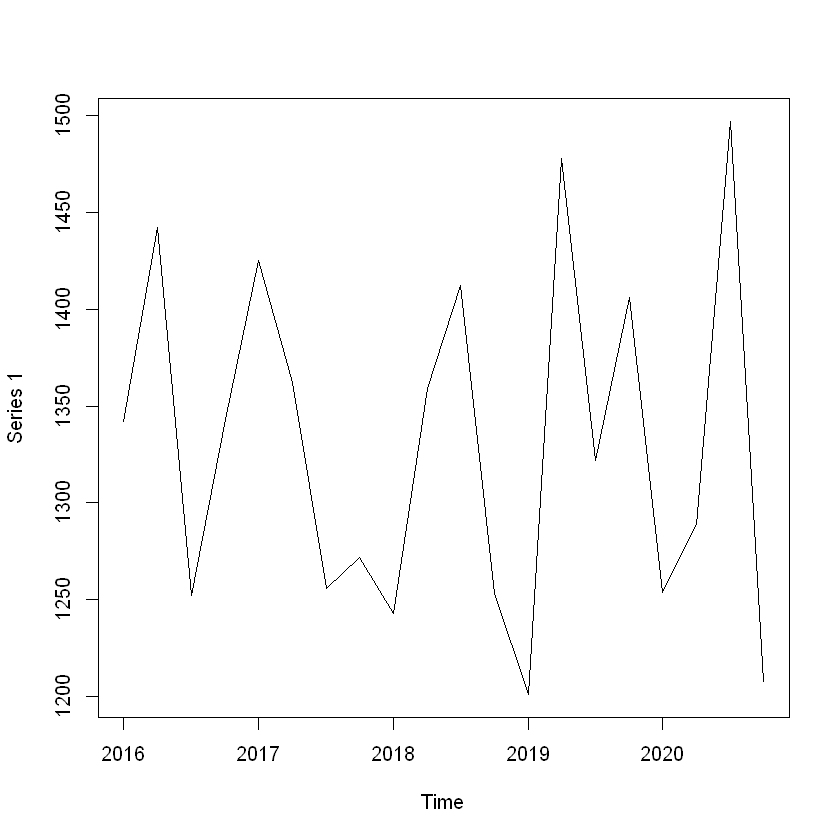

In [33]:
plot(dd.ts)


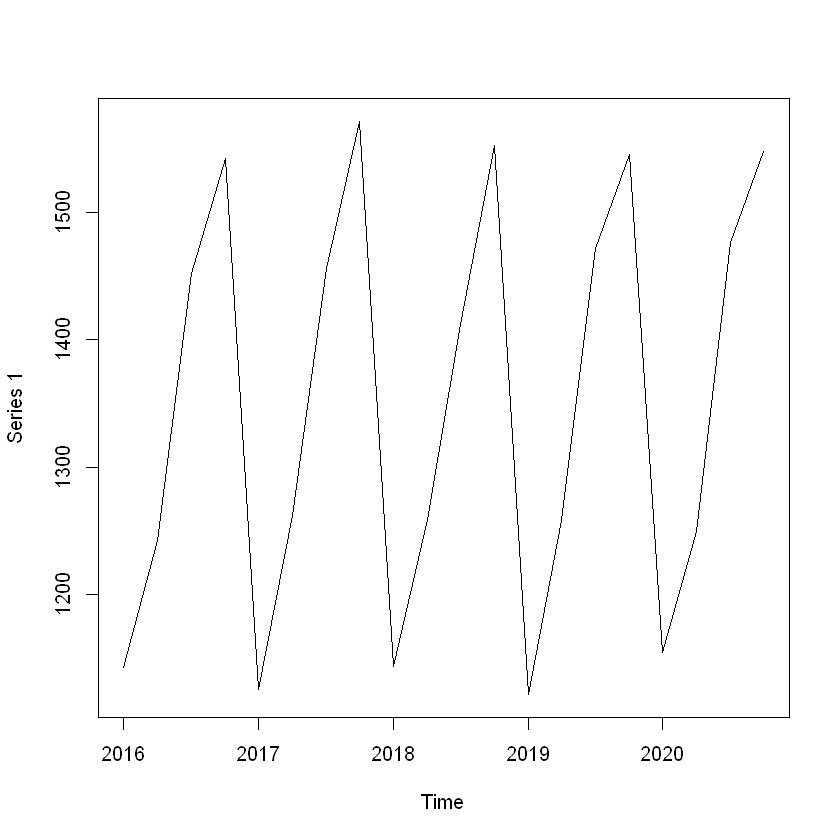

In [34]:
plot(dd2.ts)


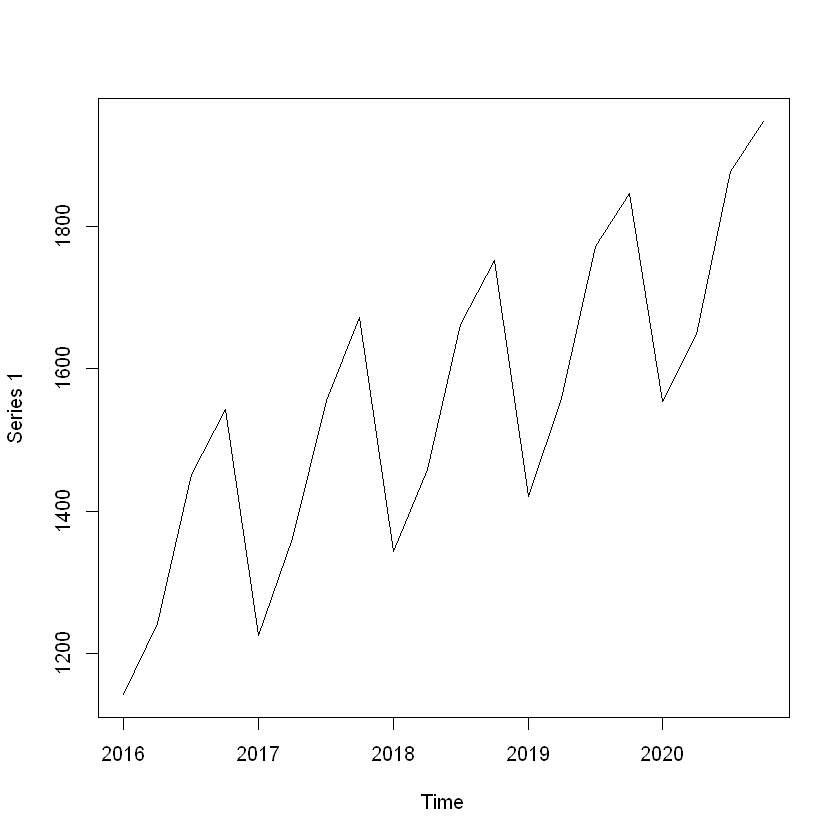

In [35]:
plot(dd4.ts)


In [37]:
#디컴포즈로 정상을 분해하면 랜덤한 모형 가지게 된다

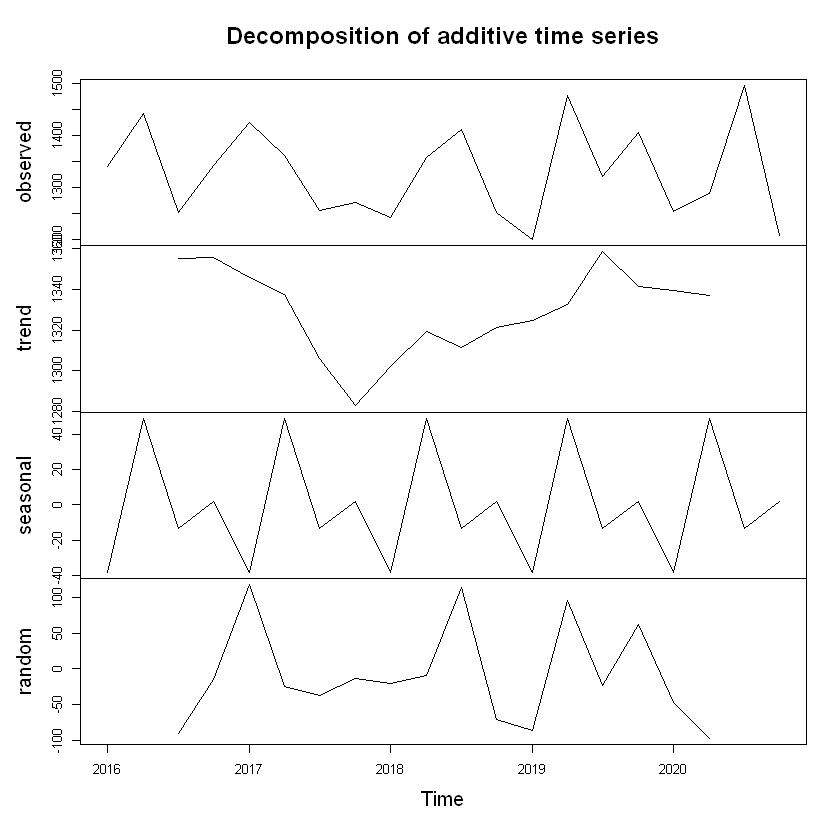

In [39]:
plot(decompose(dd.ts, type='additive'))  # 차분


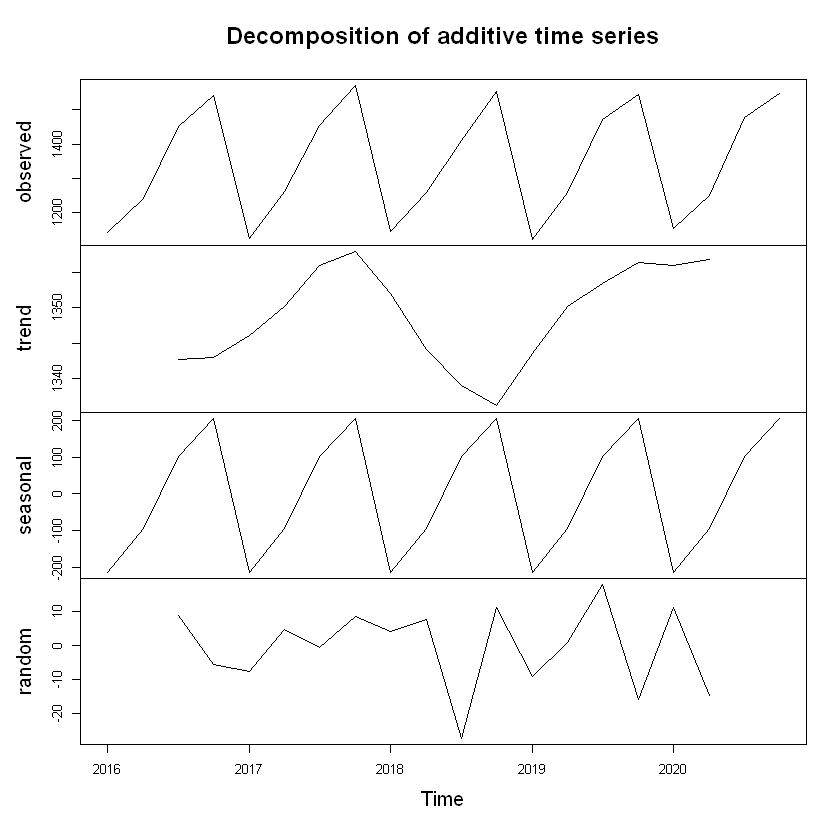

In [36]:
plot(decompose(dd2.ts, type='additive'))  # 차분


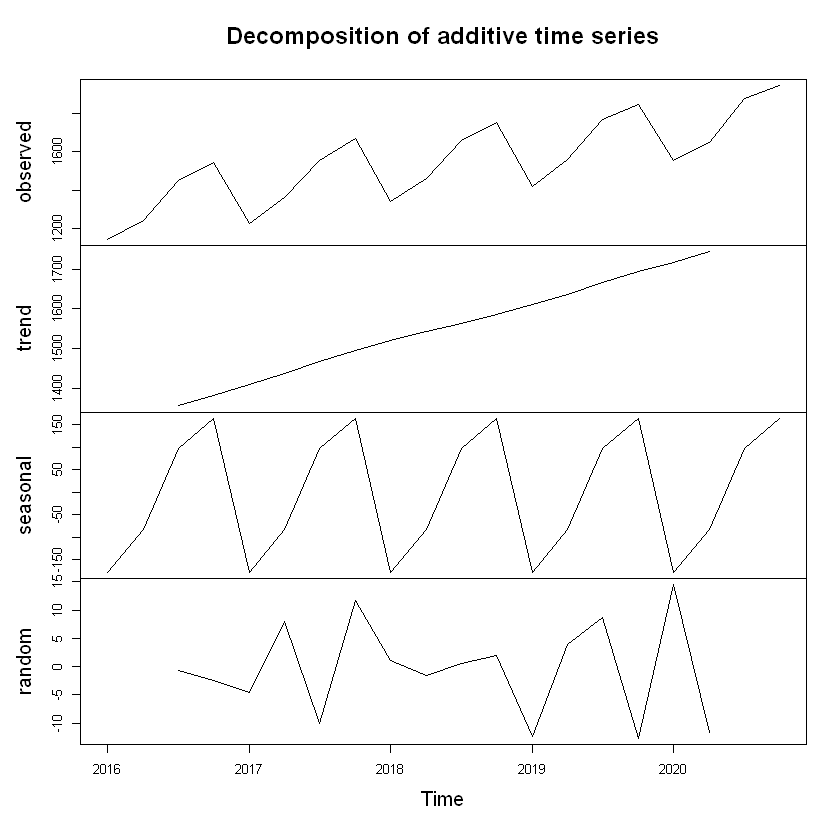

In [38]:
plot(decompose(dd4.ts, type='additive'))  # 차분
#추세랑 계절성 모두 가지고 있는 =dd4

In [41]:
dd4_a <- decompose(dd4.ts, type='a')
dd4_a 

$x
     Qtr1 Qtr2 Qtr3 Qtr4
2016 1142 1242 1452 1543
2017 1225 1362 1556 1672
2018 1343 1459 1662 1753
2019 1421 1558 1772 1846
2020 1554 1649 1877 1948

$seasonal
           Qtr1       Qtr2       Qtr3       Qtr4
2016 -178.85156  -83.53906   97.49219  164.89844
2017 -178.85156  -83.53906   97.49219  164.89844
2018 -178.85156  -83.53906   97.49219  164.89844
2019 -178.85156  -83.53906   97.49219  164.89844
2020 -178.85156  -83.53906   97.49219  164.89844

$trend
         Qtr1     Qtr2     Qtr3     Qtr4
2016       NA       NA 1355.125 1380.500
2017 1408.500 1437.625 1468.500 1495.375
2018 1520.750 1544.125 1564.000 1586.125
2019 1612.250 1637.625 1665.875 1693.875
2020 1718.375 1744.250       NA       NA

$random
            Qtr1        Qtr2        Qtr3        Qtr4
2016          NA          NA  -0.6171875  -2.3984375
2017  -4.6484375   7.9140625  -9.9921875  11.7265625
2018   1.1015625  -1.5859375   0.5078125   1.9765625
2019 -12.3984375   3.9140625   8.6328125 -12.7734375
2020  14.47656

In [42]:
dd4_a$seasonal # 계절 변동 분석결과

,Qtr1,Qtr2,Qtr3,Qtr4
2016,-178.85156,-83.53906,97.49219,164.89844
2017,-178.85156,-83.53906,97.49219,164.89844
2018,-178.85156,-83.53906,97.49219,164.89844
2019,-178.85156,-83.53906,97.49219,164.89844
2020,-178.85156,-83.53906,97.49219,164.89844


In [43]:
dd4_a$trend  #추세변동 분석 결과

,Qtr1,Qtr2,Qtr3,Qtr4
2016,NA,NA,1355.125,1380.500
2017,1408.500,1437.625,1468.500,1495.375
2018,1520.750,1544.125,1564.000,1586.125
2019,1612.250,1637.625,1665.875,1693.875
2020,1718.375,1744.250,NA,NA


In [45]:
dd4.ts

,Qtr1,Qtr2,Qtr3,Qtr4
2016,1142,1242,1452,1543
2017,1225,1362,1556,1672
2018,1343,1459,1662,1753
2019,1421,1558,1772,1846
2020,1554,1649,1877,1948


In [44]:
ddd1 <- dd4 - dd4_a$seasonal  # 계절 변동 제거
ddd1


,Qtr1,Qtr2,Qtr3,Qtr4
2016,1320.852,1325.539,1354.508,1378.102
2017,1403.852,1445.539,1458.508,1507.102
2018,1521.852,1542.539,1564.508,1588.102
2019,1599.852,1641.539,1674.508,1681.102
2020,1732.852,1732.539,1779.508,1783.102


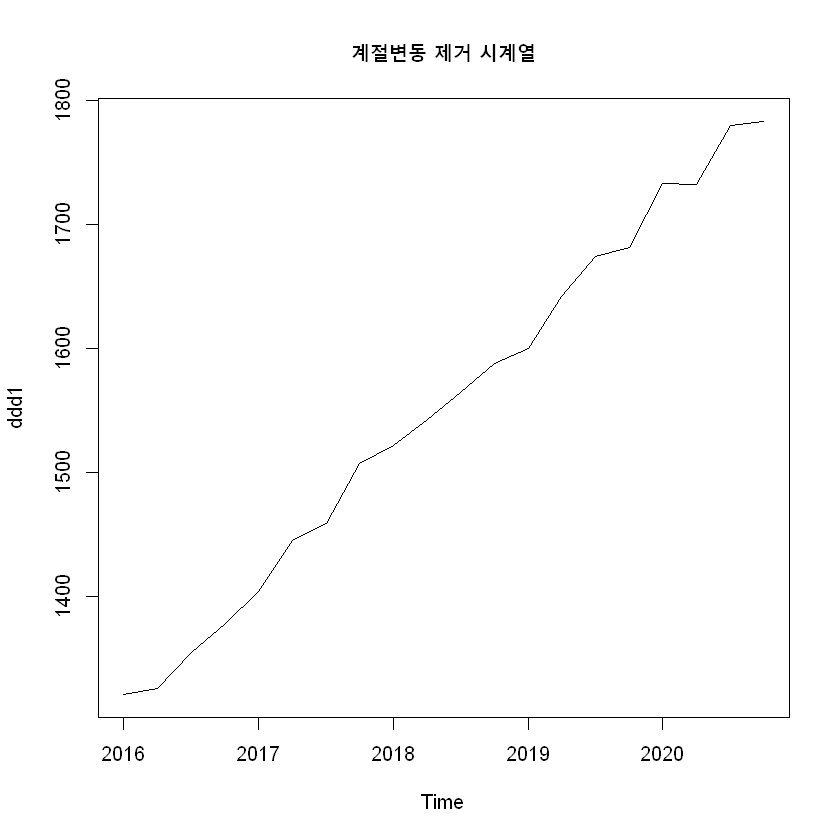

In [46]:
plot(ddd1, main="계절변동 제거 시계열")


In [47]:
ddd2 <- dd4 - dd4_a$trend  # 추세 변동 제거
ddd2


,Qtr1,Qtr2,Qtr3,Qtr4
2016,NA,NA,96.875,162.500
2017,-183.500,-75.625,87.500,176.625
2018,-177.750,-85.125,98.000,166.875
2019,-191.250,-79.625,106.125,152.125
2020,-164.375,-95.250,NA,NA


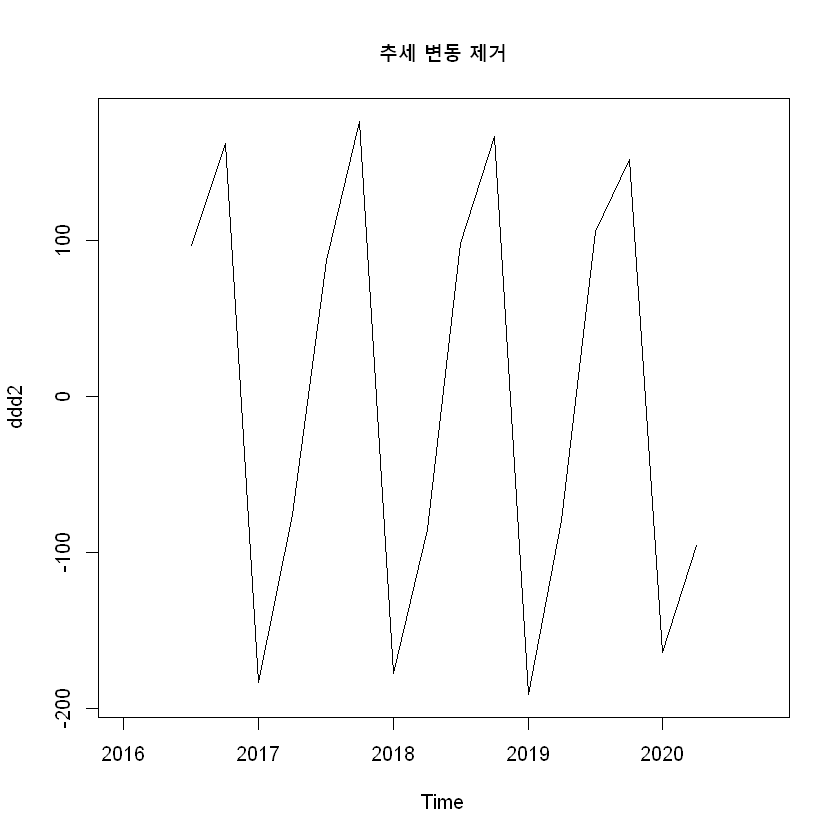

In [48]:
plot(ddd2, main="추세 변동 제거")